<a href="https://colab.research.google.com/github/Hoangthang017/CS114.K21/blob/master/FaceMask_LR/FaceMask_LR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Xây dựng model**

##**Mount drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Các thư viện được sử dụng trong bài**

In [ ]:
# import các thư viện cần dùng
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imutils import paths
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

##**Load data từ Google Drive và tiền xử lí nó**

###**Lấy đường dẫn file chưa data và khởi tạo 2 list data và label**

- Dùng hàm list_images của thư viện paths để lấy tất cả link của ảnh chứa trong folder 
- Biến Mask  và Without_mask dùng để đếm số lượng từng loại trong dataset

In [ ]:
# load dataset 
print(" loading images...")

# lấy link ảnh có khẩu trang và không có khẩu trang
imagePaths_Mask = list(paths.list_images('/content/drive/My Drive/CS114/FaceMask/FaceMask_LogicticsRegression/Datasets/Mask'))
imagePaths_No_Mask =  list(paths.list_images('/content/drive/My Drive/CS114/FaceMask/FaceMask_LogicticsRegression/Datasets/Without_mask'))

# hợp nhất 2 link vào 1 file
imagePaths = imagePaths_Mask + imagePaths_No_Mask

# khởi tạo dữ liệu
data = []

# khởi tạo label ứng với dữ liệu
labels = []

# số lượng Mask vs Without_mask
Mask = 0
Without_mask = 0

 loading images...


##**Load từng ảnh từ file và preprocess nó**
- Load hình ảnh từ link đã lấy được 
- Tiến hành resize ảnh về 32x32 nhằm giảm số lượng feature cho model Logictics Regression
- Biến đổi ảnh này từ mảng 3 chiều thành 1 vector bằng hàm flatten của thư viện numpy
  - ứng với mỗi giá trị trong vector sẽ là 1 feature trong model

In [ ]:
# Vòng lặp để load dữ liệu 

for imagePath in imagePaths:
	# lấy nhãn từ đường dẫn tệp
	label = imagePath.split("/")[-2]

	# load hình ảnh 
	image = cv2.imread(imagePath)
	
	# preprocess ảnh
	image = cv2.resize(image,(32,32)).flatten()
	
  # đẩy dữ liệu vào data và label 
	data.append(image)
 
	# Gán label
	if (label == "Mask"):
			label = 1
			Mask += 1
	else:
			label = 0
			Without_mask += 1

	# đẩy label vào
	labels.append(label)

##**Biểu đồ thể hiện số lượng data**

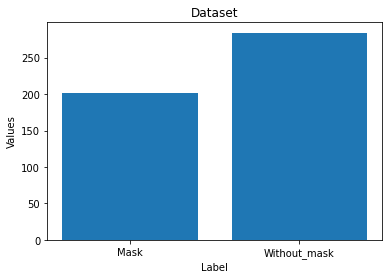

In [ ]:
# Biểu đồ thể hiện số lượng data 
Label = ["Mask","Without_mask"]
Values = [Mask,Without_mask]

plt.bar(Label,Values)
plt.title("Dataset")
plt.xlabel("Label")
plt.ylabel("Values")

plt.show()

##**Chuyển data và label sang dạng mảng**

In [ ]:
# chuyển label và data sang dạng mảng 
labels = np.array(labels)
data = np.array(data)

print(data)
print(data.shape)

[[ 26  35  45 ...  42  52  60]
 [  8   9  13 ...  72  96 126]
 [ 24  20  19 ... 114  91  75]
 ...
 [169 156 170 ... 173 183 200]
 [198 142 117 ... 162 187 225]
 [226 213 219 ...  50  57  86]]
(485, 3072)


##**Chia dữ liệu thành 2 phần train và test**
- chia data thành 2 phần nhằm đánh giá model không bị overfiting 

In [ ]:
# chia đữ liệu thành 75% để train và 25% để test
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25,stratify=labels,random_state=1)

In [ ]:
print(trainX.shape)
print(testX.shape)
print(trainX)

(363, 3072)
(122, 3072)
[[ 47  50  66 ...  26  15  21]
 [146 156 183 ...  58  61  70]
 [  5  10  21 ...  10  25  26]
 ...
 [ 46 205 235 ...  19  27 176]
 [161 160 180 ...  11  12  16]
 [159 142  97 ...  17  24  39]]



##**Training và đánh giá model**
- Chọn model thuộc Binary Classification bởi vì label có dạng 0 và 1 
- Các model Binary Classification được sử dụng trong bài :
  -  Decision Tree
  - Random Forest
  - Logictic Regression
- Tiến hành training và đánh giá model thông qua hàm classification_report của thư viện sklearn
- Chọn ra model có accuracy cao nhất để tiến hành predict với ảnh thực tế

In [ ]:
# Model Decision Tree
Model_DT = DecisionTreeClassifier()
Model_DT.fit(trainX,trainY)
print(classification_report(testY,Model_DT.predict(testX)))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89        71
           1       0.85      0.86      0.85        51

    accuracy                           0.88       122
   macro avg       0.87      0.88      0.87       122
weighted avg       0.88      0.88      0.88       122



In [ ]:
# Model Random Forest
Model_RF = RandomForestClassifier()
Model_RF.fit(trainX,trainY)
print(classification_report(testY,Model_RF.predict(testX)))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.92      0.94      0.93        51

    accuracy                           0.94       122
   macro avg       0.94      0.94      0.94       122
weighted avg       0.94      0.94      0.94       122



In [ ]:
# Model Logictic Regression
model_Logic = LogisticRegression()
model_Logic.fit(trainX,trainY)
print(classification_report(testY, model_Logic.predict(testX)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        51

    accuracy                           0.98       122
   macro avg       0.98      0.98      0.98       122
weighted avg       0.98      0.98      0.98       122



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


##**Save Model**
- Lưu model để thuận tiện cho việc sử dụng

In [ ]:
import pickle
f = open('/content/drive/My Drive/CS114/FaceMask/FaceMask_LogicticsRegression/Model_LR/FaceDataset.pkl', 'wb')
pickle.dump(model_Logic, f)

##**Link tham khảo**
https://towardsdatascience.com/classifying-cat-pics-with-a-logistic-regression-model-e35dfb9159bb
https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html
